#Loading and Preprocessing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score

In [3]:
path_train = "/content/drive/Training_preprocessed.xlsx"
path_test = '/content/drive/Test_preprocessed.xlsx'
dataframe_train = pd.read_excel(path_train)
dataframe_test = pd.read_excel(path_test)
dataframe_train = dataframe_train.drop(columns = ['second',"val_0_var" ,"val_1_var"	,"val_2_var"	,"val_3_var"	,"val_4_var"	,"val_5_var"])

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##Data augmentation

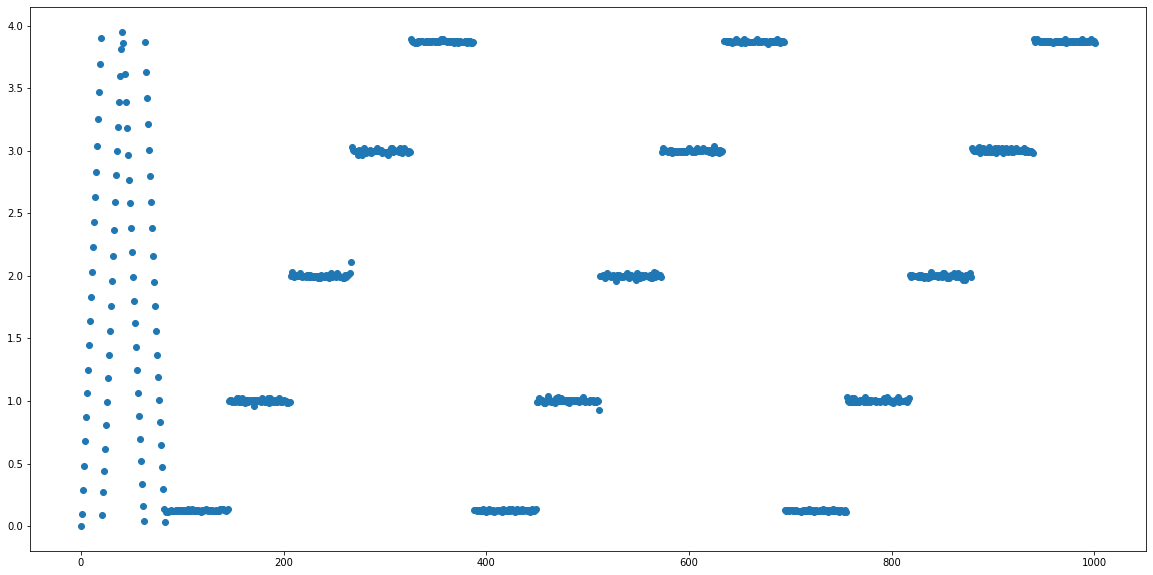

In [4]:
plt.figure(figsize=(20, 10))
plt.scatter(np.arange(len(dataframe_train['class'])),dataframe_train['class'])

In [5]:
noisy_data = dataframe_train[0:80]
dataframe_train_new = pd.concat([dataframe_train,noisy_data])
dataframe_train_new = pd.concat([dataframe_train_new,noisy_data])
dataframe_train_new = pd.concat([dataframe_train_new,noisy_data])
dataframe_train_new

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,val_3_max,...,val_3_sum,val_4_sum,val_5_sum,val_0_std,val_1_std,val_2_std,val_3_std,val_4_std,val_5_std,class
0,41.0,49.0,95.0,120.0,47.0,46.0,41.0,50.0,96.0,121.0,...,3500.0,1368.0,1356.0,0.000000,0.384426,0.350931,0.470824,0.384426,0.435494,0.00
1,18.0,19.0,18.0,10.0,14.0,17.0,46.0,76.0,103.0,124.0,...,54271.0,26089.0,27381.0,2.287621,5.896111,26.416758,38.948626,7.553299,3.295951,0.10
2,23.0,32.0,15.0,11.0,16.0,31.0,48.0,65.0,98.0,125.0,...,52329.0,27266.0,27800.0,1.792723,4.255157,26.304800,40.252709,4.550546,1.860322,0.29
3,26.0,25.0,19.0,15.0,16.0,32.0,48.0,70.0,102.0,127.0,...,52597.0,26785.0,27590.0,1.565147,5.214452,25.509263,39.295043,5.509494,2.184437,0.48
4,23.0,30.0,20.0,12.0,19.0,33.0,46.0,69.0,108.0,127.0,...,48303.0,26848.0,27788.0,1.581023,4.815222,27.064296,40.876464,5.202366,1.715481,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5.0,5.0,6.0,5.0,5.0,5.0,64.0,112.0,49.0,169.0,...,31287.0,7599.0,37513.0,14.742134,14.068961,11.885488,56.042454,5.869848,62.402413,1.37
76,7.0,7.0,6.0,6.0,7.0,6.0,58.0,53.0,53.0,170.0,...,46556.0,8100.0,62219.0,15.314024,11.817680,12.340002,63.710817,5.092179,59.316650,1.19
77,6.0,7.0,8.0,7.0,7.0,6.0,63.0,55.0,58.0,173.0,...,80028.0,12276.0,21594.0,12.646930,7.894456,10.298594,52.297367,8.319035,44.294780,1.01
78,7.0,7.0,8.0,6.0,6.0,6.0,55.0,58.0,59.0,172.0,...,78036.0,13694.0,21716.0,11.262438,9.068447,9.900833,53.937731,8.461953,41.567706,0.83


#Dataset split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataframe_train_new[dataframe_train_new.columns[:-1]],
                                                    dataframe_train_new[[dataframe_train_new.columns[-1]]],
                                                    test_size = .3,
                                                    random_state = 1)
y_train = np.ravel(y_train)
cv = KFold(3, shuffle= True)

In [7]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#tuning mlp


In [8]:
from sklearn.model_selection import GridSearchCV

distributions = dict( hidden_layer_sizes =[(60,20,7),(70,30,10),(50,20,7)],
                      activation = ['relu', 'logistic'],
                      solver = ['sgd'],
                      alpha = [1],
                      batch_size=[40,50,60,70],
                      learning_rate_init =[0.01,0.02,0.05,0.1],
                      shuffle=[True],
                      max_iter = [250])
model = MLPRegressor()
clf = GridSearchCV(model, distributions, scoring = 'neg_mean_absolute_error',refit=True, cv=cv, verbose =4)
search = clf.fit(x_train,y_train)

search.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.273 total time=   1.0s
[CV 2/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.247 total time=   0.9s
[CV 3/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.266 total time=   1.0s
[CV 1/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.02, max_iter=250, shuffle=True, solver=sgd;, score=-0.293 total time=   0.6s
[CV 2/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.02, max_iter=250, shuffle=True, solver=sgd;, score=-0.277 total time=   0.6s
[CV 3/3] END activ

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _

[CV 1/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.1, max_iter=250, shuffle=True, solver=sgd;, score=nan total time=   2.0s
[CV 2/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.1, max_iter=250, shuffle=True, solver=sgd;, score=-0.389 total time=   0.2s
[CV 3/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(60, 20, 7), learning_rate_init=0.1, max_iter=250, shuffle=True, solver=sgd;, score=-1.098 total time=   0.3s
[CV 1/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(70, 30, 10), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.282 total time=   1.0s
[CV 2/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(70, 30, 10), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.232 total time=   1.1s
[CV 3/3] END activation=relu, alpha=1, batch_size=40, hidden_layer_sizes=(70, 30, 10

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._

[CV 3/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(70, 30, 10), learning_rate_init=0.1, max_iter=250, shuffle=True, solver=sgd;, score=nan total time=   1.6s
[CV 1/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(50, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.263 total time=   1.0s
[CV 2/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(50, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.224 total time=   0.9s
[CV 3/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(50, 20, 7), learning_rate_init=0.01, max_iter=250, shuffle=True, solver=sgd;, score=-0.255 total time=   1.2s
[CV 1/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(50, 20, 7), learning_rate_init=0.02, max_iter=250, shuffle=True, solver=sgd;, score=-0.253 total time=   0.7s
[CV 2/3] END activation=relu, alpha=1, batch_size=50, hidden_layer_sizes=(50, 20, 7

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.26201663 -0.28886769 -0.35439793         nan -0.25886877 -0.27800739
 -0.38312967 -0.8816186  -0.26394774 -0.27060162 -0.35791836 -0.65076009
 -0.23277155 -0.25427577 -0.29501589 -0.39720903 -0.23509798 -0.24424539
 -0.33487379         nan -0.24716483 -0.25631275 -0.30017559 -0.6342077
 -0.22212239 -0.2414609  -0.24250303 -0.60136282 -0.22027199 -0.2388842
 -0.27645057 -0.61367892 -0.22623156 -0.2400791  -0.26220506 -0.62979132
 -0.23503277 -0.24263465 -0.28975669 -0.79693363 -0.2265382  -0.24001142
 -0.26546225 -0.86994721 -0.23581457 -0.26231369 -0.3002489  -0.34715348
 -0.94633544 -0.54729335 -0.94688313 -0.56079683 -0.53888839 -0.95070748
 -0.55214646 -0.54428564 -0.74938944 -0.74418784 -0.543461   -0.93374561
 -0.50880922 -0.5183311  -0.51057807 -0.54699108 -0.50464415 -0.50517295
 -0.54306071 -0.51825836 -0.50930437 -0.51110319 -0.51598255

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 60,
 'hidden_layer_sizes': (70, 30, 10),
 'learning_rate_init': 0.01,
 'max_iter': 250,
 'shuffle': True,
 'solver': 'sgd'}

In [9]:
(-1)*search.best_score_

0.22027198656694483

0.9632062420801126


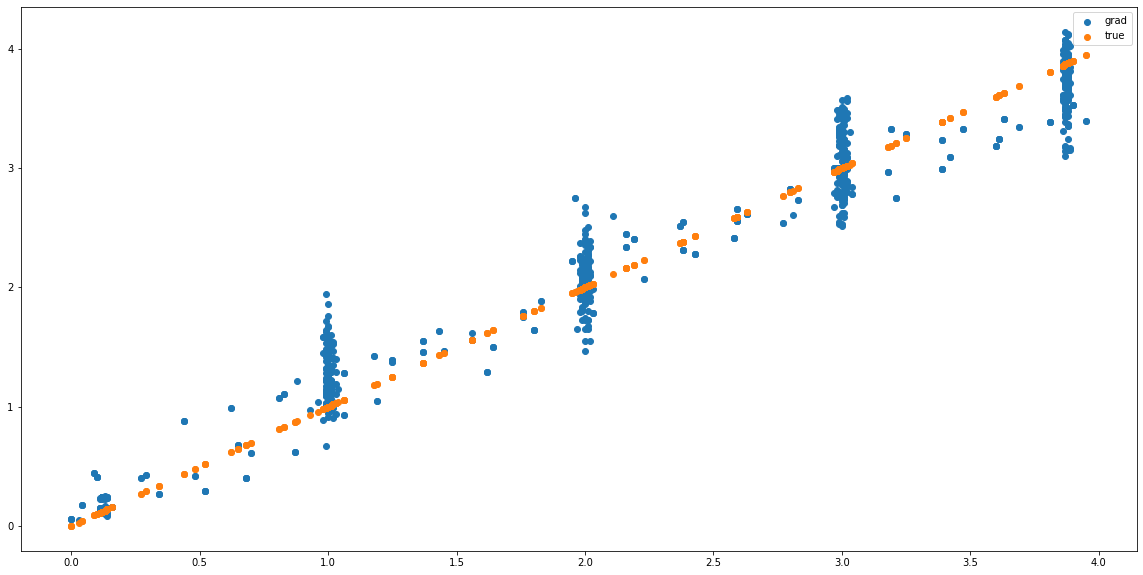

In [10]:
y_pred = search.predict(x_train)
print(r2_score(y_train, y_pred))
plt.figure(figsize=(20, 10))
plt.scatter(y_train,y_pred,label='grad')
plt.scatter(y_train,y_train,label='true')
plt.legend()

#Final model

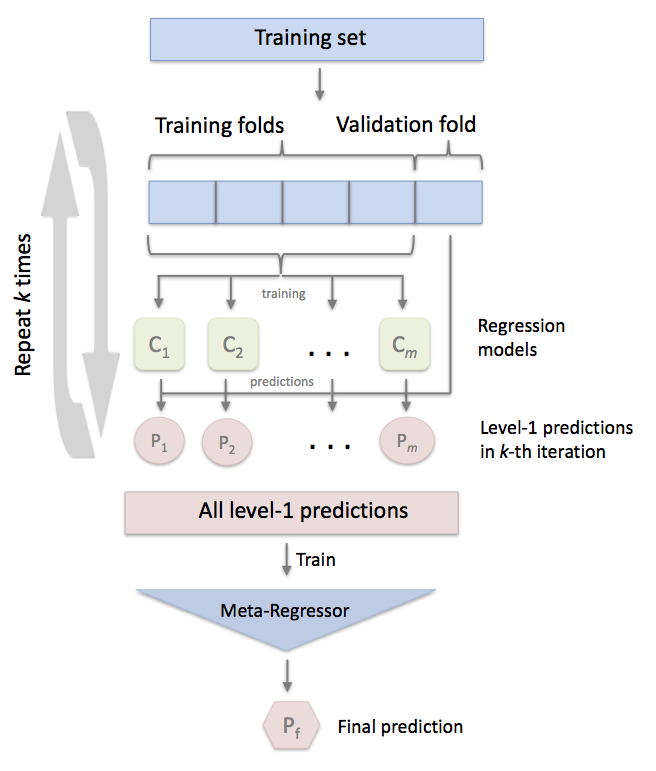

In [ ]:
model1 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(criterion = "absolute_error", max_depth=3),
                           loss= 'linear', 
                           learning_rate = 1, 
                           n_estimators = 18)
model2 = MLPRegressor(activation = 'relu',
                      alpha= 1,
                      batch_size=  40,
                      hidden_layer_sizes= (50, 20, 7),
                      learning_rate_init= 0.01,
                      max_iter= 250,
                      shuffle= True,
                      solver= 'sgd')
voter = StackingRegressor( [('mlp',model2)], final_estimator= model1, cv = cv)
voter.fit(x_train,y_train)

StackingRegressor(cv=KFold(n_splits=3, random_state=RandomState(MT19937) at 0x7FF7861706B0,
   shuffle=True),
                  estimators=[('mlp',
                               MLPRegressor(alpha=1, batch_size=40,
                                            hidden_layer_sizes=(50, 20, 7),
                                            learning_rate_init=0.01,
                                            max_iter=250, solver='sgd'))],
                  final_estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                                                         max_depth=3),
                                                    learning_rate=1,
                                                    n_estimators=18))

0.2056731875719217
0.936089551118917


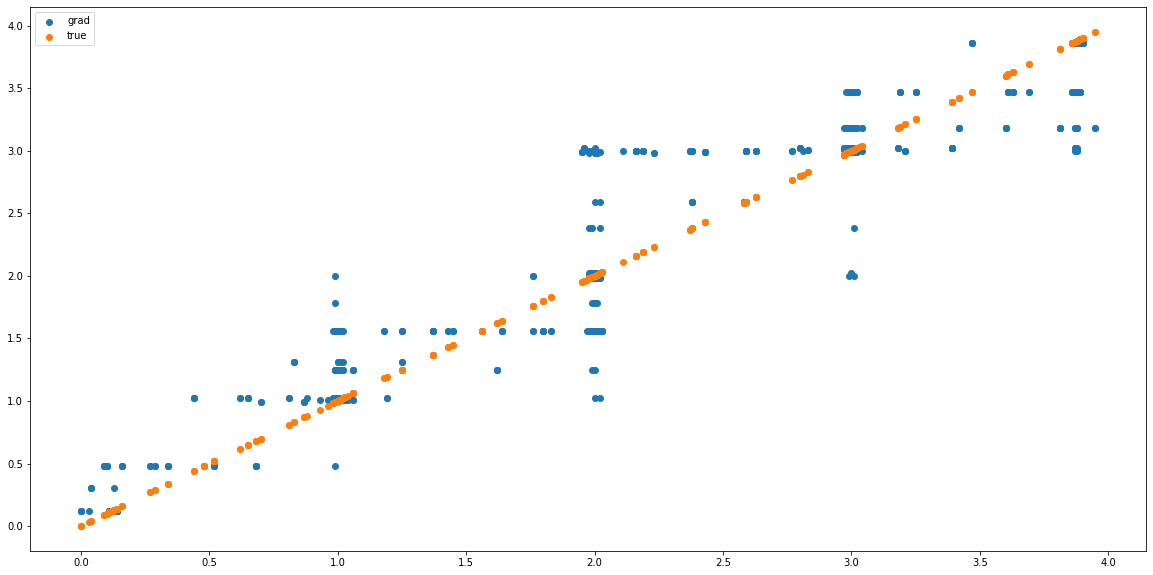

In [ ]:
y_pred = voter.predict(x_train)
print(mean_absolute_error(y_train, y_pred))
print(r2_score(y_train, y_pred))
plt.figure(figsize=(20, 10))
plt.scatter(y_train,y_pred,label='grad')
plt.scatter(y_train,y_train,label='true')
plt.legend()

#test

MAE:  0.20801608579088465
r2:  0.9305733960377444


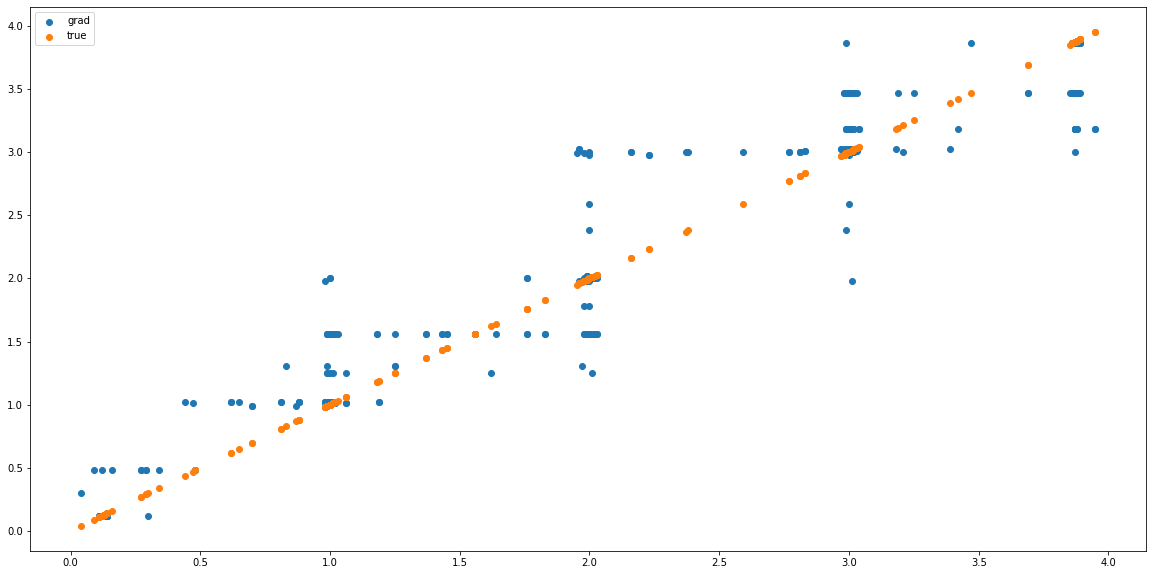

In [ ]:
def fun(x):
  if(x <0):
    return 0
  elif (x>4):
    return 4
  else:
    return x

norma = np.vectorize(fun)
y_pred5 = voter.predict(x_test)
y_pred5 = norma(y_pred5)
print("MAE: ", mean_absolute_error(y_test, y_pred5))
print("r2: ", r2_score(y_test, y_pred5))
plt.figure(figsize=(20, 10))
plt.scatter(y_test,y_pred5,label='grad')
plt.scatter(y_test,y_test,label='true')
plt.legend()

#Submission

In [ ]:
x_train, y_train = dataframe_train_new[dataframe_train_new.columns[:-1]], dataframe_train_new[[dataframe_train_new.columns[-1]]]
y_train = np.ravel(y_train)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
model1 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(criterion = "absolute_error", max_depth=3),loss= 'linear', learning_rate = 1, n_estimators = 18)
model2 = MLPRegressor(activation = 'relu',
                        alpha= 1,
                      batch_size=  40,
                      hidden_layer_sizes= (50, 20, 7),
                      learning_rate_init= 0.01,
                      max_iter= 250,
                      shuffle= True,
                      solver= 'sgd')
voter = StackingRegressor( [('mlp',model2)], final_estimator= model1, cv = cv)
clf = voter.fit(x_train,y_train)

In [ ]:
def fun(x):
  if(x <0):
    return 0
  elif (x>4):
    return 4
  else:
    return x


dataframe_test = dataframe_test.drop(columns = ["val_0_var" ,"val_1_var"	,"val_2_var"	,"val_3_var"	,"val_4_var"	,"val_5_var"])
e_test_scaled = pd.DataFrame(scaler.transform(dataframe_test.iloc[:,1:]), columns = dataframe_test.columns[1:])
test_pred = clf.predict(e_test_scaled)
dataframe_test['RQ'] = test_pred
dataframe_test['RQ'] = dataframe_test['RQ'].apply(fun)
dataframe_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_3_sum,val_4_sum,val_5_sum,val_0_std,val_1_std,val_2_std,val_3_std,val_4_std,val_5_std,RQ
0,0.0,14.0,17.0,16.0,14.0,13.0,11.0,39.0,57.0,99.0,...,74619.0,20716.0,14512.0,4.221631,5.811678,16.823652,31.716844,6.735265,3.493457,1.01
1,1.0,6.0,8.0,12.0,10.0,7.0,5.0,37.0,49.0,96.0,...,72508.0,14037.0,7635.0,5.374673,8.384175,18.482581,33.848272,8.878503,5.493130,1.99
2,2.0,6.0,7.0,7.0,6.0,6.0,5.0,36.0,49.0,90.0,...,20063.0,8631.0,14839.0,7.343757,7.188455,24.210578,38.462332,4.992304,8.337549,2.43
3,3.0,6.0,6.0,6.0,5.0,5.0,5.0,36.0,37.0,87.0,...,12140.0,7217.0,7704.0,5.473444,4.390694,15.784262,22.402361,3.511924,5.434497,3.00
4,4.0,6.0,8.0,11.0,8.0,7.0,5.0,34.0,47.0,96.0,...,69582.0,12888.0,7256.0,5.063297,8.638790,20.899157,39.094312,8.958503,5.071132,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415.0,6.0,7.0,7.0,6.0,7.0,6.0,55.0,50.0,56.0,...,9581.0,13394.0,8837.0,6.859056,6.011947,5.456176,9.217868,16.853174,6.251420,3.39
416,416.0,6.0,7.0,7.0,6.0,7.0,6.0,56.0,53.0,47.0,...,10006.0,15973.0,12346.0,7.380536,6.889961,5.261988,12.148977,22.018450,13.776196,3.39
417,417.0,10.0,23.0,31.0,49.0,18.0,10.0,89.0,125.0,77.0,...,94375.0,78676.0,72120.0,14.381153,20.992022,4.482755,6.995291,74.419321,64.198702,1.01
418,418.0,6.0,7.0,6.0,5.0,5.0,6.0,62.0,62.0,46.0,...,6491.0,10160.0,7677.0,8.553811,6.575750,5.617294,7.391333,18.036394,12.891964,3.00


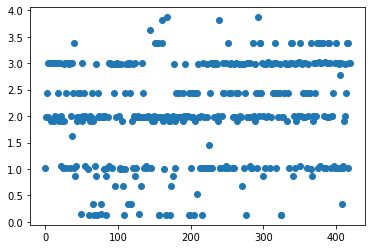

In [ ]:
plt.scatter(np.arange(0,420), dataframe_test['RQ'])

In [ ]:
sub = dataframe_test[['second','RQ']]
sub = sub.astype({"second": int, "RQ": np.float16})
sub.to_csv('Submission12.csv', index = False)